# Things to include
I prefer we use mathematical formulas to get values of our respective variables given the independent variables like speed etc.
data loging interval is 0.1 second.
1. tire compound(c1,c2,c3,c4,c5)
2. Velocity of the car in; high speed corners, straight line with their coresponding tire wear.
3. type of motosport and the car's weight.
4. simulate the track, that is including the banked curves, change in elevations etc.

## Final version of the notebook

Outro: https://youtu.be/-q6gUoJgZCM

In [2]:
# Border customs 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

random.seed(42)

In [3]:
# Constants
time_interval = 1.0  # Logging interval in seconds
session_length = 40 #Defining how long the session length.
session_duration = (session_length * 60.0)/time_interval  # Total session duration in seconds (20 minutes)
total_rows = int(session_duration / time_interval)
teams = ["Team_A", "Team_B", "Team_C"]
drivers = ["Driver_1", "Driver_2"]


# entry_log session_duration time_interval 


# Define motorsport categories with lift coefficients
motorsport_categories = {
    "DTM": {"weight_kg": 1300,"lift_coefficient": 0.4,"Cd": 0.28,"max_engine_force": 6750,"max_brake_force": 9250,"frontal_area": 2.2,"SA": 2.6,"Top speed": 283,"weight_distribution": [45, 55]}, #[front,rear]
    "WEC": {"weight_kg": 900,"lift_coefficient": 0.5,"Cd": 0.32,"max_engine_force": 5250,"max_brake_force": 8250,"frontal_area": 1.9,"SA": 2.5,"Top speed": 307,"weight_distribution": [40, 60]},
    "F1": {"weight_kg": 750,"lift_coefficient": 0.6,"Cd": 0.47,"max_engine_force": 7750,"max_brake_force": 12500,"frontal_area": 1.6,"SA": 2.46,"Top speed": 316,"weight_distribution": [42, 58]}
}

# Define track day classes with models, weights, and lift coefficients
track_day_classes = {
    "Sports Car": {"model": "Ferrari 458 2013","weight_kg": 1395,"lift_coefficient": 0.53,"Cd": 0.33,"max_engine_force": 4250,"max_brake_force": 6250,"frontal_area": 2.4,"SA": 2.6,"Top speed": 302,"weight_distribution": [43,57]}, #[front,rear]
    "SUV": {"models": "Porsche Cayenne S","weight_kg": 2285,"lift_coefficient": 0.35,"Cd": 0.36,"max_engine_force": 3250,"max_brake_force": 5250,"frontal_area": 2.6,"SA": 3.1,"Top speed": 240,"weight_distribution": [55,45]},
    "Sedan": {"models": "BMW M3 2024","weight_kg": 1808,"lift_coefficient": 0.32,"Cd": 0.3,"max_engine_force": 3750,"max_brake_force": 5750,"frontal_area": 2.3,"SA": 2.8,"Top speed": 260,"weight_distribution": [50,50]},
    "Hot Hatch": {"models": "Volkswagen Golf GTI 2024","weight_kg": 1445,"lift_coefficient": 0.28,"Cd": 0.31,"max_engine_force": 3200,"max_brake_force": 4800,"frontal_area": 2.2,"SA": 2.6,"Top speed": 250,"weight_distribution": [ 60, 40]},
    "Sub-Urban": {"models": "Toyota RAV4 Hybrid 2024","weight_kg": 1680,"lift_coefficient": 0.35,"Cd": 0.34,"max_engine_force": 2800,"max_brake_force": 4200,"frontal_area": 2.5,"SA": 3.0,"Top speed": 180,"weight_distribution": [55, 45]},
    "Crossover": {"models": "Hyundai Tucson 2024","weight_kg": 1590,"lift_coefficient": 0.33,"Cd": 0.32,"max_engine_force": 3000,"max_brake_force": 4500,"frontal_area": 2.4,"SA": 2.9,"Top speed": 210,"weight_distribution": [52, 48]}
}

tracks = {
    "Nürburgring Nordschleife": {"roughness_range": (1.2, 1.7), "air_density": 1.1, "humidity": (50,70), "ambiet_temp": (15, 22), "wind_speed":(2, 6),
                                 "throttle_time":[4.5, 8.2, 4.8, 6.4, 15.0, 2.1, 3.5, 4.2, 6.0, 13.1,2.0, 4.4, 3.8, 5.5, 4.3, 9.7, 6.2, 7.9, 5.3, 6.6,5.1, 4.7, 3.9, 2.3, 3.0, 6.5, 5.4, 10.5, 4.1, 5.8,3.8, 4.9, 5.1, 5.7, 2.4, 4.6, 6.1, 2.6, 9.0, 2.9,5.3, 3.7, 4.6, 4.8, 3.6, 5.4, 2.2, 22.7, 3.5, 6.3,3.9, 13.8, 6.2, 4.5, 5.8, 4.6, 6.0, 5.9, 10.1, 11.3,4.2, 11.9, 5.5, 4.3, 12.7, 6.4, 3.8, 8.3, 4.4, 5.1,3.6, 3.9, 9.5, 5.5, 4.6, 10.2,10.4],
                                 "brake_time":[0.8, 1.2, 0.7, 1.1, 2.5, 1.3, 0.9, 1.0, 0.6, 1.5,1.4, 0.7,2.8,3.9, 1.3,0.7, 1.9, 0.6, 1.4, 0.9, 0.5, 1.2, 0.8, 1.1, 0.7,1.3, 0.9, 0.6, 1.2, 1.0, 0.7, 0.8, 1.3,1.4, 0.7, 1.1, 0.9, 0.6, 1.3, 0.8, 0.5, 1.2,0.6, 1.1, 0.8, 1.0, 1.3, 0.7, 1.2, 0.9, 1.1, 0.6,1.3, 1.0, 0.5, 1.4, 0.8, 0.6, 1.1, 0.7, 1.2, 4.9,1.3, 2.6, 0.8,2.6,1.7,3.4,2.5,1.1,2.6,2.1,4.9,2.4,4.1,8.3]},
    "Monza": {"roughness_range": (0.8,1.2), "air_density": 1.225, "humidity": (45,65), "ambiet_temp": (25, 30), "wind_speed":(2, 5),
              "throttle_time":[7.5, 4.2, 5.8, 6.5, 4.5, 6.0, 8.2, 3.0, 5.5, 6.3, 5.0, 10.5,6.0],
              "brake_time":[1.0, 2.8, 1.5, 0.9, 1.7, 0.8, 1.2, 2.0, 0.6, 1.5, 1.4, 0.9]},
    "Red Bull Ring": {"roughness_range": ( 0.9,1.3), "air_density": 1.1, "humidity": (50,70), "ambiet_temp": (20,26), "wind_speed":(3,7),
                      "throttle_time":[7.5,16.0,14.0,4.5,6.0,4.0,3.5,5.0,4.0,5.2,6.2],
                      "brake_time":[1.6,4.2,2.8,3.7,0.4,1.3,1.8,1.6,1.9,1.2]},
    "Monaco": {"roughness_range": (1.0,1.5), "air_density": 1.225, "humidity": (55,75), "ambiet_temp": ( 22,27), "wind_speed":(1,3),
               "throttle_time":[2.7, 1.2, 4.2, 1.8, 2.3, 2.0, 1.4, 1.5, 2.0, 7.5,2.2, 2.5, 2.0, 1.8, 1.4, 1.7, 1.3, 1.5, 1.5, 2.3,2.1],
               "brake_time":[1.3, 1.4, 0.3, 1.3, 1.3, 1.6, 1.8, 1.6, 1.4, 0.2,1.6, 1.2, 2.0, 0.8, 0.6, 1.1, 1.0, 1.9, 0.6, 2.2]
              }  # Higher for street circuit
}

#SHC - J/(kg·°C) tire_mass - kg tire_area - m² heat_transfer_coefficient - W/(m²·°C)
tire_compounds = {
    "C1": {"friction_coefficient": 1.2,"rolling_resistance_coefficient": 0.011,"initial_tread_depth": 8.0,"heat_transfer_coefficient": 200,"tire_area": [0.25, 0.30],"specific_heat_capacity": 1500,"tire_mass": [10, 12]},#[front, rear]
    "C2": {"friction_coefficient": 1.1,"rolling_resistance_coefficient": 0.010,"initial_tread_depth": 7.5,"heat_transfer_coefficient": 190,"tire_area": [0.24, 0.29],"specific_heat_capacity": 1450,"tire_mass": [9.5, 11.5]},
    "C3": {"friction_coefficient": 1.0,"rolling_resistance_coefficient": 0.009,"initial_tread_depth": 7.0,"heat_transfer_coefficient": 195,"tire_area": [ 0.23,  0.28],"specific_heat_capacity": 1400,"tire_mass": [9, 11]},
    "C4": {"friction_coefficient": 0.9,"rolling_resistance_coefficient": 0.008,"initial_tread_depth": 6.5,"heat_transfer_coefficient": 180,"tire_area": [0.22, 0.27],"specific_heat_capacity": 1350,"tire_mass": [8.5, 10.5]},
    "C5": {"friction_coefficient": 0.8,"rolling_resistance_coefficient": 0.007,"initial_tread_depth": 6.0,"heat_transfer_coefficient": 175,"tire_area": [ 0.21, 0.26],"specific_heat_capacity": 1300,"tire_mass": [8, 10]}
}

# Average delta lap times (in seconds) per category for tire wear impact
average_delta_times = {
    "F1": 85, "DTM": 105, "WEC": 125, "Track Day": 140
}



In [4]:
####MODELLING FUNCTIONS.

# Function to calculate force on tire
def calculate_force_on_tire(weight, speed, SA, lift_coefficient, air_density):
    weight_n = weight * 9.81 # Convert weight to Newtons
    downforce = 0.5 * air_density * (speed ** 2) * SA * lift_coefficient
    return weight_n + downforce # Total force on tire in Newtons

# Function to simulate tire wear influenced by lap time category and track roughness
def calculate_tire_wear(speed, steering_position, surface_roughness, category, lap_time_delta):
    base_wear = 0.0005 * speed * (1 + abs(steering_position))
    roughness_factor = surface_roughness / 2.5  # Normalized impact factor
    category_factor = lap_time_delta / 100  # Normalized lap time effect
    return base_wear * (1 + roughness_factor + category_factor)

In [5]:
#Ease on the acceleration
def smooth_throttle_adjustment(previous_throttle,time_interval):
    # Ensure the previous throttle value is within the valid range

    on_throttle_rate = 0.31
    # Determine how much to reduce the throttle based on the logging interval
    throttle_decrease_rate = time_interval * on_throttle_rate
    
    # Calculate the new throttle position
    current_throttle = max(0.00, (previous_throttle + on_throttle_rate * (1 - previous_throttle)) + throttle_decrease_rate)

    return round(current_throttle, 2)



In [6]:
#This function has one objective which is to check the current tire status and choose if to pit and get new sets of tires or not.
#This is an overwatch function

def box_box(previous_tire_wear,initial_tread_depth,c_front_surface_temp,c_rear_surface_temp,c_front_inner_temp,c_rear_inner_temp,reset_depth):    
    #What prompts for a change in tire change is fairly a simple model, when the tire thread depth limit is hit we call in a "box box"

    #We do all the changing tires here to the previous_tire_wear, and depth
    #We reset the previous tire wear. 
    previous_tire_wear = 0
    c_front_surface_temp=85;c_rear_surface_temp=100;c_front_inner_temp=65;c_rear_inner_temp=85
    initial_tread_depth = reset_depth

    return previous_tire_wear,c_front_surface_temp,c_rear_surface_temp,c_front_inner_temp,c_rear_inner_temp,initial_tread_depth
  
    
    
'''
                            #Overwatching the tire wear.
                            left = box_box(previous_tire_wear,initial_tread_depth,c_front_surface_temp,c_rear_surface_temp,c_front_inner_temp,c_rear_inner_temp,reset_depth)
                            previous_tire_wear=left[0];c_front_surface_temp=left[1];c_rear_surface_temp=left[2];c_front_inner_temp=left[3];c_rear_inner_temp=left[4];initial_tread_depth=left[5]                            

'''

'\n                            #Overwatching the tire wear.\n                            left = box_box(previous_tire_wear,initial_tread_depth,c_front_surface_temp,c_rear_surface_temp,c_front_inner_temp,c_rear_inner_temp,reset_depth)\n                            previous_tire_wear=left[0];c_front_surface_temp=left[1];c_rear_surface_temp=left[2];c_front_inner_temp=left[3];c_rear_inner_temp=left[4];initial_tread_depth=left[5]                            \n\n'

In [7]:
#The Driver's Judgement Input and background covert operations

def tire_confidence(previous_tire_wear,adjust_throttle_time,adjust_brake_time):
    tire_confidence = 1 #This value will let the driver dictate if to advance or retard the braking time
    if previous_tire_wear < 3.0:
        tire_confidence = 0
        adjust_throttle_time -= 0.2
        adjust_brake_time += 1.6
    return adjust_throttle_time, adjust_brake_time

def profile_merger(track_throttle_profile,track_brake_profile):
    #constants
    merged = []; i,j=0,0
    
    #I intend to merge the brake and throttle profiles into a singe list all in alternating order, with throttle taking the even indices.
    for value in range(max(len(track_throttle_profile), len(track_brake_profile))):
        if i < len(track_throttle_profile):
            merged.append(track_throttle_profile[i])
        if j < len(track_brake_profile):
            merged.append(track_brake_profile[j])
        i+=1;j+=1
    return merged

def adjust_to_car_class(car_class,adjust_throttle_time,adjust_brake_time):
    if car_class == "DTM":
        adjust_throttle_time += random.uniform(0.1,0.8)
        adjust_brake_time += random.uniform(0.7,2.0)

    elif car_class == "WEC":
        adjust_throttle_time += random.uniform(0.2,0.6)
        adjust_brake_time += random.uniform(-0.2,-0.8)        

    elif car_class == "F1":
        adjust_throttle_time += random.uniform(0.9,1.6)
        adjust_brake_time += random.uniform(-0.5,-1.0)
    #"Sports Car" "SUV" "Sedan"
    return adjust_throttle_time, adjust_brake_time    
    

def max_verstappen(car_class,previous_tire_wear,track_throttle_profile,track_brake_profile,entry_log,going,cumilative_profile_sum,time_interval,previous_throttle):
    #Stating the constants.
    throttle = 0.00;brake=0.00 #The data point start with the outputs as zeros.
    front_surface_temp=0;rear_surface_temp=0;front_inner_temp=0;rear_inner_temp=0
     
    #adjust_throttle_time & adjust_brake_time dictate by how much to advance or retard the braking or throttle
    adjust_throttle_time = 0 
    adjust_brake_time = 0
    
    #Getting the throttle and brake profile merged in alternating order.
    merged = profile_merger(track_throttle_profile,track_brake_profile)
    
    ###SELF-AWARENESS: Stage 1: The tire
    tune = tire_confidence(previous_tire_wear,adjust_throttle_time,adjust_brake_time)
    adjust_throttle_time = tune[0]
    adjust_brake_time = tune[1]

    ###SELF-AWARENESS: Stage 2: The car.
    tuneII = adjust_to_car_class(car_class,adjust_throttle_time,adjust_brake_time)
    adjust_throttle_time = tuneII[0]
    adjust_brake_time = tuneII[1]
    
    
    ###EFFECT ON THE SESSION
    f = going #iterates through the merged list. even=acceleration and odd=braking
    states = 'throttle'  # Having this variable helps to identify which action is going on. I has 2 values; throttle and brake.
    # Later in the future I intend to introduce a new state called 'transition'.
    # Comes in between the change from brake to throttle(very crutial to prevent loss of traction.)

    ####POINT OF WEAKNESS
    ## When we exhaust the indices of the merge counter we have to reset the f value to a 0.
    if f > len(merged):
        ######## this is the block of code we shall increase the lap count.
        f = 0 #we reset the value of f.
    
    duration = merged[f] #defining the new duration to be added in the cumilative profile.
    
    # We adjust the cumilative profile sum to the new value.
    # we keep an eye at entry_log and when it is less than our throttle or brake profile value the throttle/brake value recorded.
    if entry_log < cumilative_profile_sum:
        pass
    elif entry_log > cumilative_profile_sum:

        f += 1 # first we need to increase the f counter; helps transvering in the merged list of the throttle and brake profile.
        if duration == merged[-1]:
            f = 0

        #Adjusting the profile depending on various constrains.
        #In this block I need to change the action states base on the entry log value.
        #Here we need to increment cumilative_profile_sum.

        if f % 2 == 0: #All accelerations/throttle durations have even indices.
            duration += adjust_throttle_time
            states = 'throttle'
        else:
            duration += adjust_brake_time
            states = 'brake'

        duration = round(merged[f]) #Redefining the duration.
        cumilative_profile_sum += duration #seting up the new cumilative profile.

    #1. We need a logic control that checks the action in progress.
    #2. dictate the values of throttle and brake.
    #3. 
    if states == 'throttle':
        throttle = smooth_throttle_adjustment(previous_throttle, time_interval)
        if throttle > 1.00:
            throttle = 1.00
        if duration > 3:
            #decreasing the tire temps.
            front_surface_temp= (-2*time_interval);rear_surface_temp=(-1*time_interval);front_inner_temp=(-3*time_interval);rear_inner_temp=(-1*time_interval)

    elif states == 'brake':
        brake = 1.00
        
        #increasing tire temps
        front_surface_temp = (60*time_interval);rear_surface_temp = (51*time_interval); front_inner_temp = (77*time_interval); rear_inner_temp = (67*time_interval)

    else: 
        #The code block subsequent is ment for future updating to the driver function. This includes adding extra logic conditions.
        print("error")

    return throttle, brake, f,cumilative_profile_sum,front_surface_temp,rear_surface_temp,front_inner_temp,rear_inner_temp


In [8]:
#Tire degradation.

#I pray this is the last function I have to introduce, for I shall start throwing fists if it aint.
def rubber_compound_degrade(speed,friction_coefficient,force_on_tire,time_interval,initial_tire_health=100):
    #Defining the in function parameters.
        """
        Calculate tire degradation based on speed, friction coefficient, load, and time interval.

        Arguments:
        - speed (m/s): The speed of the car.
        - friction_coefficient: The coefficient of friction between the tire and the track.
        - load (N): The load on the tire (related to weight and downforce).
        - time_interval (s): Time step in seconds.
        - initial_tire_health: The initial health of the tire (percentage), default is 100.

        Returns:
        - tire_health: The updated health of the tire (percentage).
        """
        # Base wear rate factor, which could be tuned to fit real-world data
        base_wear_rate = 0.00001  # Adjust this to control overall degradation rate

        # Calculate wear rate based on speed, friction, and load
        wear_rate = base_wear_rate * speed * friction_coefficient * force_on_tire

        # Calculate degradation over the time interval
        tire_degradation = wear_rate * time_interval

        # Update the tire health
        tire_health = max(0, initial_tire_health - tire_degradation)  # Tire health should not go below 0

        return tire_health


In [9]:
# current speed & max acceleration and deceleration
def max_acc(max_engine_force, weight, friction_coefficient,throttle):
    
    friction_force = friction_coefficient * weight * 9.81
    throttle_force = max_engine_force * (throttle**1.41)  # for Non-linear effect, advised to raise the value to something, for now 1.41 seams okay.
    net_force = (throttle_force - friction_force)*-1
    max_acceleration = net_force / weight
    
    return max_acceleration

def max_deccel(max_brake_force, weight, friction_coefficient,brake,Cd,frontal_area,previous_speed,air_density):
    drag_force = (0.5 * air_density * Cd * frontal_area * (previous_speed ** 2))
    
    effective_brake_force = (brake * (max_brake_force**1.2))
    
    friction_force = friction_coefficient * weight * 9.81
    
    braking_force = effective_brake_force + friction_force + drag_force
    
    max_deceleration = braking_force / weight
    return max_deceleration


def current_speed (previous_speed, previous_throttle, throttle, time_interval,max_brake_force, weight,max_engine_force,friction_coefficient,brake,steering_position,lateral_g_force,longitudinal_g_force,max_velocity,Cd,frontal_area,air_density):
    throttle_change = throttle - previous_throttle
    max_accel = max_acc(max_engine_force, weight, friction_coefficient,throttle_change)
    max_decel = max_deccel(max_brake_force, weight, friction_coefficient,brake,Cd,frontal_area,previous_speed,air_density)

    if throttle > 0:
        
        new_speed = previous_speed + (max_accel) * time_interval
        new_speed = new_speed
        if new_speed > max_velocity:
            new_speed = max_velocity
        
    #elif brake == 0 and throttle_change > 0.04: #engine braking
        
        #max_engine_force = 15000
        #engine_braking_force = max_engine_force * (throttle_change ** 2)
        #deceleration = engine_braking_force / weight
        
        #new_speed = previous_speed - (deceleration * time_interval)
        #new_speed = max(new_speed, 0)
        
    else: 

        new_speed = previous_speed - max_decel * time_interval
        if new_speed < 32:
            new_speed = 32
    
    # Tire wear influenced by steering, G-forces, and speed
    tire_wear = (0.0005 * new_speed * (1 + abs(steering_position)) + 
                 0.001 * abs(lateral_g_force) +
                 0.0003 * abs(longitudinal_g_force))
    
    return new_speed, tire_wear

**The following will help in the making of the final code**

It is a base for the code I shall write.

In [10]:
#Front and rear tire temperature calculator

#We assume the load acting upon the tire is identicaly distributed to the weight distribution.
def simulate_tire_temperature(front_surface_temp, rear_surface_temp, front_inner_temp, rear_inner_temp,speed, force_on_tire, friction_coefficient, ambient_temp,HF_coefficient,tire_area_list,SHC,mass_list,weight_distribution,weight,time_interval):
    #weight = sport_attributes["weight_kg"]
    #ambient_temp = random.uniform(*track_attributes["ambiet_temp"])
    #force_on_tire = calculate_force_on_tire(weight, speed, SA, lift_coefficient, air_density)
    
    #friction_coefficient = compound_attrs["friction_coefficient"]
    #HF_coefficient = compound_attrs["heat_transfer_coefficient"]
    #tire_area_list = compound_attrs["tire_area"]
    #SHC = compound_attrs["specific_heat_capacity"]
    #mass_list = compound_attrs["tire_mass"]
                    
    #weight_distribution = sport_attributes["weight_distribution"]    
    
    """
    Simulates the tire inner and surface temperature over time using physics-based formulas.
    
    Arguments:
    - speed: The speed of the car (m/s). - speed
    - load: The load on the tire (N). - force_on_tire
    - friction_coefficient: The coefficient of friction between the tire and the road. - friction_coefficient
    - air_temp: The ambient air temperature (°C). - ambient_temp
    - initial_surface_temp: The initial temperature of the tire surface (°C). - initial_surface_temp
    - initial_inner_temp: The initial temperature of the tire inner layer (°C). - initial_inner_temp
    
    """
    ####CONTANTS BAY####
    front_initial_surface_temp =front_surface_temp
    rear_initial_surface_temp=rear_surface_temp
    
    front_initial_inner_temp=front_inner_temp
    rear_initial_inner_temp=rear_inner_temp
    
    ####FRONT TIRES BAY####
    front_mass = (mass_list[0])*2
    
    front_surface_temp = front_initial_surface_temp#*front_mass*SHC #Converting the early degrees celsius to Watts
    front_inner_temp = front_initial_inner_temp#*front_mass*SHC
    
    front_tire_area = (tire_area_list[0])*2
    front_weight = (weight_distribution[0]/100)*weight
    front_load = (weight_distribution[0]/100)*force_on_tire
    # Calculate heat gain from friction (simplified model)
    front_heat_gain = friction_coefficient * front_load * speed  # Heat generated per second (W)
    # Calculate heat loss to air (Newton's law of cooling)
    front_heat_loss = HF_coefficient * front_tire_area * (front_initial_surface_temp - ambient_temp)  # Heat lost per second (W)
    front_net_heat_surface = front_heat_gain - front_heat_loss  # Net heat transfer at the surface (W)
    front_temp_change_surface = (front_net_heat_surface * time_interval) / (SHC * front_mass)
    front_surface_temp += front_temp_change_surface
        
    # Update inner temperature (with a delay effect)
    front_inner_temp += (front_surface_temp - front_inner_temp) * 0.1 * time_interval  # Simple heat conduction model    
    
    ####REAR TIRES BAY####  
    rear_mass = (mass_list[1])*2
    
    rear_surface_temp = rear_initial_surface_temp
    rear_inner_temp = rear_initial_surface_temp
    
    rear_tire_area = (tire_area_list[1])*2
    rear_weight = (weight_distribution[1]/100)*weight
    rear_load = (weight_distribution[1]/100)*force_on_tire
    rear_heat_gain = friction_coefficient * rear_load * speed  # Heat generated per second (W)
    rear_heat_loss = HF_coefficient * rear_tire_area * (rear_initial_surface_temp - ambient_temp)
    rear_net_heat_surface = rear_heat_gain - rear_heat_loss  # Net heat transfer at the surface (W)
    rear_temp_change_surface = (rear_net_heat_surface * time_interval) / (SHC * rear_mass)
    rear_surface_temp += rear_temp_change_surface
    
    rear_inner_temp += (rear_surface_temp - rear_inner_temp) * 0.1 * time_interval  # Simple heat conduction model
    
    ####CONVERTION FROM WATTS TO DEGREES CELSIUS####
    front_surface_temp = (front_surface_temp*time_interval/(front_mass*SHC))
    front_inner_temp = (front_inner_temp*time_interval/(front_mass*SHC))
    rear_inner_temp = (rear_inner_temp*time_interval/(rear_mass*SHC))
    rear_surface_temp = (rear_surface_temp*time_interval/(rear_mass*SHC))
    
    return front_surface_temp,rear_surface_temp,front_inner_temp,rear_inner_temp

In [11]:
def logic_flow_Motorsports(): #(session_duration=2400)
    data = []
    previous_speed = 0
    previous_throttle = 0.12
    p_laptime = -time_interval
    previous_tire_wear = 0
    lap = 0;curent_lap = lap
    entry_log = -time_interval
    front_surface_temp=0;rear_surface_temp=0;front_inner_temp=0;rear_inner_temp=0
    c_front_surface_temp=85;c_rear_surface_temp=100;c_front_inner_temp=65;c_rear_inner_temp=85
    
    reset_depth = 0;overwatch = "Lights out"
    
    #previous_speed = 0;previous_throttle = 0.12;previous_tire_wear = 0;lap = 1
    
    ##Developer note: This sucker took me 3 days to figure out it was suposed to be here.
    going = 0 #Part of background coverts, it keeps track of the previous record of the previous index duration in the merger list in max verstappen function.
    cumilative_profile_sum = 0
        
    # Create data for each track, motorsport type, team, and driver
    #The logic is to start by sellecting the track. The selecting the motorsport category and then the class of the track day.
    #since they run on only one set of tire, we have to simulate for each tire
    
    
    

    for current_track, track_attributes in tracks.items():
        #print(f'Now simulating for {current_track}_______________________________________')
        #profiling the track with its attributes like temperature, humidity,roughness etc.       
        surface_roughness = random.uniform(*track_attributes["roughness_range"])
        ambient_temp = random.uniform(*track_attributes["ambiet_temp"])
        humidity = random.uniform(*track_attributes["humidity"])
        wind_speed = random.uniform(*track_attributes["wind_speed"])
        air_density= track_attributes["air_density"]
        track_throttle_profile = track_attributes["throttle_time"]
        track_brake_profile = track_attributes["brake_time"]
        
        for sport, sport_attributes in motorsport_categories.items():
            #Detailing the car's on paper attributed.
            weight = sport_attributes["weight_kg"]
            lift_coefficient = sport_attributes["lift_coefficient"]
            Cd = sport_attributes["Cd"]
            frontal_area = sport_attributes["frontal_area"]
            max_brake_force = sport_attributes["max_brake_force"]
            max_engine_force = sport_attributes["max_engine_force"]
            SA = sport_attributes["SA"]
            max_velocity = sport_attributes["Top speed"]
            car_class = sport
            #How the weight is spread from the center of gravity.
            weight_distribution = sport_attributes["weight_distribution"]
                        
            for team in teams:
                for driver in drivers:
                    lap = 0
                    for compound, compound_attrs in tire_compounds.items():
                        #print(f'Simulating for {sport}-{team}-{driver}, running on {compound}')                      
                        #prev_steering_position = 0 <----- I dont know why but this appers to be part of something bigger
                        
                        friction_coefficient = compound_attrs["friction_coefficient"]
                        initial_tread_depth = compound_attrs["initial_tread_depth"]
                        reset_depth = compound_attrs["initial_tread_depth"] #godspeed
                        rolling_resistance_coefficient = compound_attrs["rolling_resistance_coefficient"]
                        
                        #Tire compound physics specs.
                        HF_coefficient = compound_attrs["heat_transfer_coefficient"]
                        tire_area_list = compound_attrs["tire_area"]
                        SHC = compound_attrs["specific_heat_capacity"]
                        mass_list = compound_attrs["tire_mass"]
                        
                     
                        ############All the simulation happens here now.#################

                        # Simulate lap times and environmental conditions
                        #while entry_log < entry_log:  # Replace 'entry_log' with your stopping condition
                        #while entry_log < session_duration: # entry_log session_duration time_interval
                        
                        #while (TRUE):
                        
                        #When to stop the loop?
                        #if entry_log > session_duration:
                        #    break
                        for t in range(int(session_duration)): 
                        #while (entry_log<session_duration):   
                            entry_log += time_interval
                            
                            #max verstappen function will be called here, it should determine if to apply throttle or brakes.

                            ###REENSTATED THE SUBSEQUENT CODE IF NEEDED.
                            #shipment = max_verstappen(max_velocity,p_laptime,track_throttle_profile,track_brake_profile,tire_wear,tread_depth,Time,car_class)
                            #shipment[0]=throttle,shipment[1]=brake,shipment[2]=p_laptime

                            #Calling max_verstappen function.
                            driver_input = max_verstappen(car_class,previous_tire_wear,track_throttle_profile,track_brake_profile,entry_log,going,cumilative_profile_sum,time_interval,previous_throttle)
                            throttle = driver_input[0]
                            previous_throttle = throttle
                            brake = driver_input[1]
                            going = driver_input[2]
                            cumilative_profile_sum = driver_input[3]


                            steering_position = random.uniform(-0.85, 0.85)

                            lateral_g_force = random.uniform(-2.5, 2.5)

                            longitudinal_g_force = random.uniform(-2, 2)

                            shipment = current_speed (previous_speed, previous_throttle, throttle, time_interval,max_brake_force, weight,max_engine_force,friction_coefficient,brake,steering_position,lateral_g_force,longitudinal_g_force,max_velocity,Cd,frontal_area,air_density)

                            speed = shipment[0];tire_wear = shipment[1]
                            previous_tire_wear = tire_wear

                            previous_speed = speed

                            #p_laptime = p_laptime + interval
                            previous_tire_wear = previous_tire_wear + tire_wear #cumilative sum to the wear values

                            tread_depth = initial_tread_depth - previous_tire_wear * (entry_log * time_interval) 

                            force_on_tire = calculate_force_on_tire(weight, speed, SA, lift_coefficient, air_density)

                            Time = entry_log * time_interval 

                            p_laptime = p_laptime + time_interval
                            
                            calor = simulate_tire_temperature(front_surface_temp, rear_surface_temp, front_inner_temp, rear_inner_temp,speed, force_on_tire, friction_coefficient, ambient_temp,HF_coefficient,tire_area_list,SHC,mass_list,weight_distribution,weight,time_interval)
                            #return front_surface_temp,rear_surface_temp,front_inner_temp,rear_inner_temp
                            #throttle-0, brake-1, f-2,cumilative_profile_sum-3,lap-4,front_surface_temp-5,rear_surface_temp-6,front_inner_temp-7,rear_inner_temp-8
                            front_surface_temp=calor[0]+driver_input[4];rear_surface_temp=calor[1]+driver_input[5];front_inner_temp=calor[2]+driver_input[6];rear_inner_temp=calor[3]+driver_input[7]

                            tire_degradation = rubber_compound_degrade(speed,friction_coefficient,force_on_tire,time_interval,initial_tire_health=100)
                            
                            ###Overwatch needs to choose if to call a box box
                            if going == 0:
                                curent_lap += 1
                                if tire_degradation < 5:
                                    fress_tires = box_box(previous_tire_wear,initial_tread_depth,c_front_surface_temp,c_rear_surface_temp,c_front_inner_temp,c_rear_inner_temp,reset_depth)
                                    previous_tire_wear=fress_tires[0];c_front_surface_temp=fress_tires[1];c_rear_surface_temp=fress_tires[2];c_front_inner_temp=fress_tires[3];c_rear_inner_temp=fress_tires[4];initial_tread_depth=fress_tires[5];

                            
                            eventy = "Normal"

                            if random.random() < 0.03:
                                eventy = "Lock-up"
                                if speed > 180:
                                    previous_tire_wear += 0.12
                                    p_laptime += 2
                                    front_surface_temp += 9
                                    front_inner_temp += 3
                                else:
                                    previous_tire_wear += 0.13  # Additional wear on lock-up
                                    p_laptime += 1 # Laptime sufferes when one locks up
                                    front_surface_temp += 6
                                    front_inner_temp += 3

                            elif random.random() < 0.07:
                                eventy = "Loss of Traction"
                                if speed > 196:
                                    previous_tire_wear += 0.09
                                    p_laptime += 1
                                    rear_surface_temp += 3
                                    rear_inner_temp += 2
                                else:
                                    previous_tire_wear += 0.05
                                    rear_surface_temp += 2
                                    rear_inner_temp += 1

                                # Impact of loss of traction
                                throttle *= 0.2  # Let off the throttle by 20%
                                steering_position += np.clip(random.uniform(0.2, 0.5), 0, 1)  # Increase steering correction
                                p_laptime += 1


                            elif random.random() < 0.01:
                                throttle = 0
                                eventy = "puncture"
                                tread_depth = 0
                                p_laptime += 3


                                data.append({
                                    "entry log": entry_log,
                                    "Lap": curent_lap,
                                    "Motorsport_Type": sport,
                                    "Team": team,
                                    "Driver": driver,
                                    "Track": current_track,
                                    "lap_time": p_laptime,
                                    "Throttle": throttle,
                                    "Brake": brake,
                                    "Steering_Position": steering_position,
                                    "Speed": speed,
                                    "Surface_Roughness": surface_roughness,
                                    "Ambient_Temperature": ambient_temp,
                                    "Humidity": humidity,
                                    "Wind_Speed": wind_speed,
                                    "Lateral_G_Force": lateral_g_force,
                                    "Longitudinal_G_Force": longitudinal_g_force,
                                    "Tire_Compound": compound,
                                    "Tire_Friction_Coefficient": friction_coefficient,
                                    "Tire_Tread_Depth": max(0, tread_depth),
                                    "Tire_wear":tire_wear,
                                    "cumilative_Tire_Wear": previous_tire_wear,
                                    "Driving_Style": "Aggressive" if random.random() > 0.7 else "Normal",
                                    "force_on_tire": force_on_tire,
                                    "Event": eventy,
                                    "front_surface_temp":c_front_surface_temp+front_surface_temp,
                                    "rear_surface_temp":c_rear_surface_temp+rear_surface_temp,
                                    "front_inner_temp":c_front_inner_temp+front_inner_temp,
                                    "rear_inner_temp":c_rear_inner_temp+rear_inner_temp,
                                    "Tire_degradation":tire_degradation
                                })
                                #event_entry = event_entry + time_interval
                                #pass
                                    



                            # Append to data
                            data.append({
                                "entry log": entry_log,
                                "Lap": curent_lap,
                                "Motorsport_Type": sport,
                                "Team": team,
                                "Driver": driver,
                                "Track": current_track,
                                "lap_time": p_laptime,
                                "Throttle": throttle,
                                "Brake": brake,
                                "Steering_Position": steering_position,
                                "Speed": speed,
                                "Surface_Roughness": surface_roughness,
                                "Ambient_Temperature": ambient_temp,
                                "Humidity": humidity,
                                "Wind_Speed": wind_speed,
                                "Lateral_G_Force": lateral_g_force,
                                "Longitudinal_G_Force": longitudinal_g_force,
                                "Tire_Compound": compound,
                                "Tire_Friction_Coefficient": friction_coefficient,
                                "Tire_Tread_Depth": max(0, tread_depth),
                                "Tire_wear":tire_wear,
                                "cumilative_Tire_Wear": previous_tire_wear,
                                "Driving_Style": "Aggressive" if random.random() > 0.7 else "Normal",
                                "force_on_tire": force_on_tire,
                                "Event": eventy,
                                "front_surface_temp":c_front_surface_temp+front_surface_temp,
                                "rear_surface_temp":c_rear_surface_temp+rear_surface_temp,
                                "front_inner_temp":c_front_inner_temp+front_inner_temp,
                                "rear_inner_temp":c_rear_inner_temp+rear_inner_temp,
                                "Tire_degradation":tire_degradation
                            })
                            #event_entry = event_entry + time_interval
                            #if
                        previous_speed = 0;previous_throttle = 0.12;previous_tire_wear = 0;lap = 1;c_front_surface_temp=85;c_rear_surface_temp=100;c_front_inner_temp=65;c_rear_inner_temp=85
                        #continue
                    
                        
                        
                        
                
    
    return pd.DataFrame(data) #data                     
                        
                        

In [12]:
def logic_flow_Production_cars(): #(session_duration=2400)
    data = []
    previous_speed = 0
    previous_throttle = 0.12
    p_laptime = -time_interval
    previous_tire_wear = 0
    lap = 0; curent_lap = lap
    entry_log = -time_interval
    going = 0 #Part of background coverts, it keeps track of the previous record of the previous index duration in the merger list in max verstappen function.
    cumilative_profile_sum = 0
    
    front_surface_temp=85;rear_surface_temp=100;front_inner_temp=65;rear_inner_temp=85
    c_front_surface_temp=85;c_rear_surface_temp=100;c_front_inner_temp=65;c_rear_inner_temp=85
    
    reset_depth = 0    
    
    for current_track, track_attributes in tracks.items():
        #print(f'Now simulating for {current_track}_______________________________________')
        #profiling the track with its attributes like temperature, humidity,roughness etc.       
        surface_roughness = random.uniform(*track_attributes["roughness_range"])
        ambient_temp = random.uniform(*track_attributes["ambiet_temp"])
        humidity = random.uniform(*track_attributes["humidity"])
        wind_speed = random.uniform(*track_attributes["wind_speed"])
        air_density= track_attributes["air_density"]
        track_throttle_profile = track_attributes["throttle_time"]
        track_brake_profile = track_attributes["brake_time"]    

        for production_car, production_car_attributes in track_day_classes.items():
            #print(f'Running simulation track day______________class {trackday}')
            weight = production_car_attributes["weight_kg"]
            lift_coefficient = production_car_attributes["lift_coefficient"]
            Cd = production_car_attributes["Cd"]
            frontal_area = production_car_attributes["frontal_area"]
            max_brake_force = production_car_attributes["max_brake_force"]
            max_engine_force = production_car_attributes["max_engine_force"]
            SA = production_car_attributes["SA"]
            max_velocity = production_car_attributes["Top speed"]
            car_class = production_car            
            
            #How the weight is spread from the center of gravity.
            weight_distribution = production_car_attributes["weight_distribution"]

            for team in teams:
                for driver in drivers:
                    lap = 0
                    for compound, compound_attrs in tire_compounds.items():
                        #print(f'Simulating for {trackday}-{team}-{driver}, running on {compound}')
                        # prev_steering_position = 0 <--- Just going to leave this here.
                        
                        friction_coefficient = compound_attrs["friction_coefficient"]
                        initial_tread_depth = compound_attrs["initial_tread_depth"]
                        reset_depth = compound_attrs["initial_tread_depth"] #godspeed                        
                        rolling_resistance_coefficient = compound_attrs["rolling_resistance_coefficient"]
                        
                        #Tire compound physics specs.
                        HF_coefficient = compound_attrs["heat_transfer_coefficient"]
                        tire_area_list = compound_attrs["tire_area"]
                        SHC = compound_attrs["specific_heat_capacity"]
                        mass_list = compound_attrs["tire_mass"]                        
                        
                        ############## All the simulation happens here now. ###############
                        
                        # Simulate lap times and environmental conditions
                        #while entry_log < entry_log:  # Replace 'entry_log' with your stopping condition
                        #while entry_log < session_duration: # entry_log session_duration time_interval
                        
                        for t in range(int(session_duration)):
                        #while (entry_log<session_duration):
                            #elif entry_log != session_duration:
                            #for t in range(total_rows):
                            entry_log += time_interval

                            #max verstappen function will be called here, it should determine if to apply throttle or brakes.

                            ###REENSTATED THE SUBSEQUENT CODE IF NEEDED.
                            #shipment = max_verstappen(max_velocity,p_laptime,track_throttle_profile,track_brake_profile,tire_wear,tread_depth,Time,car_class)
                            #shipment[0]=throttle,shipment[1]=brake,shipment[2]=p_laptime

                            #Calling max_verstappen function.
                            driver_input = max_verstappen(car_class,previous_tire_wear,track_throttle_profile,track_brake_profile,entry_log,going,cumilative_profile_sum,time_interval,previous_throttle)

                            throttle = driver_input[0]
                            previous_throttle = throttle
                            brake = driver_input[1]
                            going = driver_input[2]
                            cumilative_profile_sum = driver_input[3]
                            lap = driver_input[4]


                            steering_position = random.uniform(-0.85, 0.85)

                            lateral_g_force = random.uniform(-2.5, 2.5)

                            longitudinal_g_force = random.uniform(-2, 2)

                            shipment = current_speed (previous_speed, previous_throttle, throttle, time_interval,max_brake_force, weight,max_engine_force,friction_coefficient,brake,steering_position,lateral_g_force,longitudinal_g_force,max_velocity,Cd,frontal_area,air_density)

                            speed = shipment[0];tire_wear = shipment[1]
                            previous_tire_wear = tire_wear

                            previous_speed = speed

                            #p_laptime = p_laptime + interval

                            previous_tire_wear = previous_tire_wear + tire_wear #cumilative sum to the wear values

                            tread_depth = initial_tread_depth - tire_wear * (entry_log * time_interval) 

                            force_on_tire = calculate_force_on_tire(weight, speed, SA, lift_coefficient, air_density)

                            Time = entry_log * time_interval 

                            p_laptime = p_laptime + time_interval

                            calor = simulate_tire_temperature(front_surface_temp, rear_surface_temp, front_inner_temp, rear_inner_temp,speed, force_on_tire, friction_coefficient, ambient_temp,HF_coefficient,tire_area_list,SHC,mass_list,weight_distribution,weight,time_interval)
                            #return front_surface_temp,rear_surface_temp,front_inner_temp,rear_inner_temp
                            front_surface_temp=calor[0]+driver_input[4];rear_surface_temp=calor[1]+driver_input[5];front_inner_temp=calor[2]+driver_input[6];rear_inner_temp=calor[3]+driver_input[7]
                            
                            tire_degradation = rubber_compound_degrade(speed,friction_coefficient,force_on_tire,time_interval,initial_tire_health=100)
                            
                            ###Overwatch needs to choose if to call a box box
                            if going == 0:
                                curent_lap += 1
                                if tire_degradation < 5:
                                    fress_tires = box_box(previous_tire_wear,initial_tread_depth,c_front_surface_temp,c_rear_surface_temp,c_front_inner_temp,c_rear_inner_temp,reset_depth)
                                    previous_tire_wear=fress_tires[0];c_front_surface_temp=fress_tires[1];c_rear_surface_temp=fress_tires[2];c_front_inner_temp=fress_tires[3];c_rear_inner_temp=fress_tires[4];initial_tread_depth=fress_tires[5];

                            
                            eventy = "Normal"

                            if random.random() < 0.03:
                                eventy = "Lock-up"
                                if speed > 180:
                                    previous_tire_wear += 0.12
                                    p_laptime += 2
                                    front_surface_temp += 9
                                    front_inner_temp += 3
                                else:
                                    previous_tire_wear += 0.13  # Additional wear on lock-up
                                    p_laptime += 1 # Laptime sufferes when one locks up
                                    front_surface_temp += 6
                                    front_inner_temp += 3

                            elif random.random() < 0.07:
                                eventy = "Loss of Traction"
                                if speed > 196:
                                    previous_tire_wear += 0.09
                                    p_laptime += 1
                                    rear_surface_temp += 3
                                    rear_inner_temp += 2
                                else:
                                    previous_tire_wear += 0.05
                                    rear_surface_temp += 2
                                    rear_inner_temp += 1

                                # Impact of loss of traction
                                throttle *= 0.2  # Let off the throttle by 20%
                                steering_position += np.clip(random.uniform(0.2, 0.5), 0, 1)  # Increase steering correction
                                p_laptime += 1


                            elif random.random() < 0.01:
                                throttle = 0
                                eventy = "puncture"
                                tread_depth = 0
                                p_laptime += 3


                                data.append({
                                    "entry log": entry_log,
                                    "Lap": curent_lap,
                                    "Motorsport_Type": production_car,
                                    "Team": team,
                                    "Driver": driver,
                                    "Track": current_track,
                                    "lap_time": p_laptime,
                                    "Throttle": throttle,
                                    "Brake": brake,
                                    "Steering_Position": steering_position,
                                    "Speed": speed,
                                    "Surface_Roughness": surface_roughness,
                                    "Ambient_Temperature": ambient_temp,
                                    "Humidity": humidity,
                                    "Wind_Speed": wind_speed,
                                    "Lateral_G_Force": lateral_g_force,
                                    "Longitudinal_G_Force": longitudinal_g_force,
                                    "Tire_Compound": compound,
                                    "Tire_Friction_Coefficient": friction_coefficient,
                                    "Tire_Tread_Depth": max(0, tread_depth),
                                    "Tire_wear":tire_wear,
                                    "cumilative_Tire_Wear": previous_tire_wear,
                                    "Driving_Style": "Aggressive" if random.random() > 0.7 else "Normal",
                                    "force_on_tire": force_on_tire,
                                    "Event": eventy,
                                    "front_surface_temp":c_front_surface_temp+front_surface_temp,
                                    "rear_surface_temp":c_rear_surface_temp+rear_surface_temp,
                                    "front_inner_temp":c_front_inner_temp+front_inner_temp,
                                    "rear_inner_temp":c_rear_inner_temp+rear_inner_temp,
                                    "Tire_degradation":tire_degradation
                                    })
                                
                                previous_speed = 0;previous_throttle = 0.12;previous_tire_wear = 0;lap = 1
                                #event_entry = event_entry + time_interval
                                #pass
                                    
                                #break



                            # Append to data
                            data.append({
                                "entry log": entry_log,
                                "Lap": curent_lap,
                                "Motorsport_Type": production_car,
                                "Team": team,
                                "Driver": driver,
                                "Track": current_track,
                                "lap_time": p_laptime,
                                "Throttle": throttle,
                                "Brake": brake,
                                "Steering_Position": steering_position,
                                "Speed": speed,
                                "Surface_Roughness": surface_roughness,
                                "Ambient_Temperature": ambient_temp,
                                "Humidity": humidity,
                                "Wind_Speed": wind_speed,
                                "Lateral_G_Force": lateral_g_force,
                                "Longitudinal_G_Force": longitudinal_g_force,
                                "Tire_Compound": compound,
                                "Tire_Friction_Coefficient": friction_coefficient,
                                "Tire_Tread_Depth": max(0, tread_depth),
                                "Tire_wear":tire_wear,
                                "cumilative_Tire_Wear": previous_tire_wear,
                                "Driving_Style": "Aggressive" if random.random() > 0.7 else "Normal",
                                "force_on_tire": force_on_tire,
                                "Event": eventy,
                                "front_surface_temp":c_front_surface_temp+front_surface_temp,
                                "rear_surface_temp":c_rear_surface_temp+rear_surface_temp,
                                "front_inner_temp":c_front_inner_temp+front_inner_temp,
                                "rear_inner_temp":c_rear_inner_temp+rear_inner_temp,
                                "Tire_degradation":tire_degradation
                                })
                                
                            #event_entry = event_entry + time_interval
                            #if 
                        previous_speed = 0;previous_throttle = 0.12;previous_tire_wear = 0;lap = 1;c_front_surface_temp=85;c_rear_surface_temp=100;c_front_inner_temp=65;c_rear_inner_temp=85
    
    return pd.DataFrame(data) #data                      
                            
        

In [13]:
def merged_dataset():
    data_frame1 = logic_flow_Motorsports()
    data_frame2 = logic_flow_Production_cars()
    
    combined_df = pd.concat([data_frame1, data_frame2], axis=0,ignore_index=True) # axis=0 combines them row-wise
    
    return pd.DataFrame(combined_df) #pd.DataFrame(dictionary1,dictionary2)  
    #return data_frame1


In [14]:
simulated_dataset = merged_dataset()
simulated_dataset


,entry log,Lap,Motorsport_Type,Team,Driver,Track,lap_time,Throttle,Brake,Steering_Position,...,Tire_wear,cumilative_Tire_Wear,Driving_Style,force_on_tire,Event,front_surface_temp,rear_surface_temp,front_inner_temp,rear_inner_temp,Tire_degradation
0,0.0,1,DTM,Team_A,Driver_1,Nürburgring Nordschleife,1.0,0.70,0.0,0.666705,...,0.011969,0.153938,Normal,12832.267751,Lock-up,89.000092,99.000078,65.000009,84.000008,98.187263
1,1.0,1,DTM,Team_A,Driver_1,Nürburgring Nordschleife,2.0,0.00,1.0,-0.511976,...,0.024995,0.049990,Normal,13338.728000,Normal,145.000391,151.000191,142.000039,151.999994,94.877928
2,2.0,1,DTM,Team_A,Driver_1,Nürburgring Nordschleife,3.0,0.62,0.0,-0.271574,...,0.030101,0.060202,Aggressive,13848.945127,Normal,83.002359,99.001722,62.002546,84.001447,92.725648
3,3.0,1,DTM,Team_A,Driver_1,Nürburgring Nordschleife,4.0,1.00,0.0,0.390544,...,0.039367,0.078734,Normal,14517.697755,Normal,83.000419,99.000384,61.999952,84.000013,90.323548
4,4.0,1,DTM,Team_A,Driver_1,Nürburgring Nordschleife,5.0,1.00,0.0,0.347772,...,0.047961,0.095921,Normal,15344.985886,Normal,83.000555,99.000500,61.999966,84.000025,87.604443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615007,1727995.0,136968,Crossover,Team_C,Driver_2,Monaco,2013354.0,0.62,0.0,-0.749340,...,0.037714,0.205428,Normal,16528.645807,Lock-up,91.003512,100.002332,68.003683,85.001999,94.730932
2615008,1727996.0,136968,Crossover,Team_C,Driver_2,Monaco,2013355.0,0.00,1.0,0.343118,...,0.023351,0.046702,Aggressive,16198.130400,Normal,145.000790,151.000298,142.000209,152.000030,95.853279
2615009,1727997.0,136968,Crossover,Team_C,Driver_2,Monaco,2013356.0,0.62,0.0,0.539389,...,0.033154,0.066309,Aggressive,16528.645807,Normal,85.003512,100.002332,65.003683,85.001999,94.730932
2615010,1727998.0,136968,Crossover,Team_C,Driver_2,Monaco,2013357.0,1.00,0.0,-0.076450,...,0.026649,0.053299,Normal,16931.366004,Normal,85.000781,100.000462,65.000078,85.000046,93.539533


In [15]:
simulated_dataset = simulated_dataset.dropna(how='any', axis=0)
missing_values = simulated_dataset.isnull().sum()
missing_values

entry log                    0
Lap                          0
Motorsport_Type              0
Team                         0
Driver                       0
Track                        0
lap_time                     0
Throttle                     0
Brake                        0
Steering_Position            0
Speed                        0
Surface_Roughness            0
Ambient_Temperature          0
Humidity                     0
Wind_Speed                   0
Lateral_G_Force              0
Longitudinal_G_Force         0
Tire_Compound                0
Tire_Friction_Coefficient    0
Tire_Tread_Depth             0
Tire_wear                    0
cumilative_Tire_Wear         0
Driving_Style                0
force_on_tire                0
Event                        0
front_surface_temp           0
rear_surface_temp            0
front_inner_temp             0
rear_inner_temp              0
Tire_degradation             0
dtype: int64

In [16]:
import pickle
with open('simulated_dataset.pkl', 'wb') as f:
    pickle.dump(simulated_dataset, f)

In [17]:
#converting the dataset to a csv file and uploading it to kaggle.
#simulated_dataset.to_csv("simulated_dataset.csv", index=False)

In [18]:
#Telemetry Display Code.
# ploting the telemetary of speed and throttle over time
df_subset = simulated_dataset.iloc[:20000]

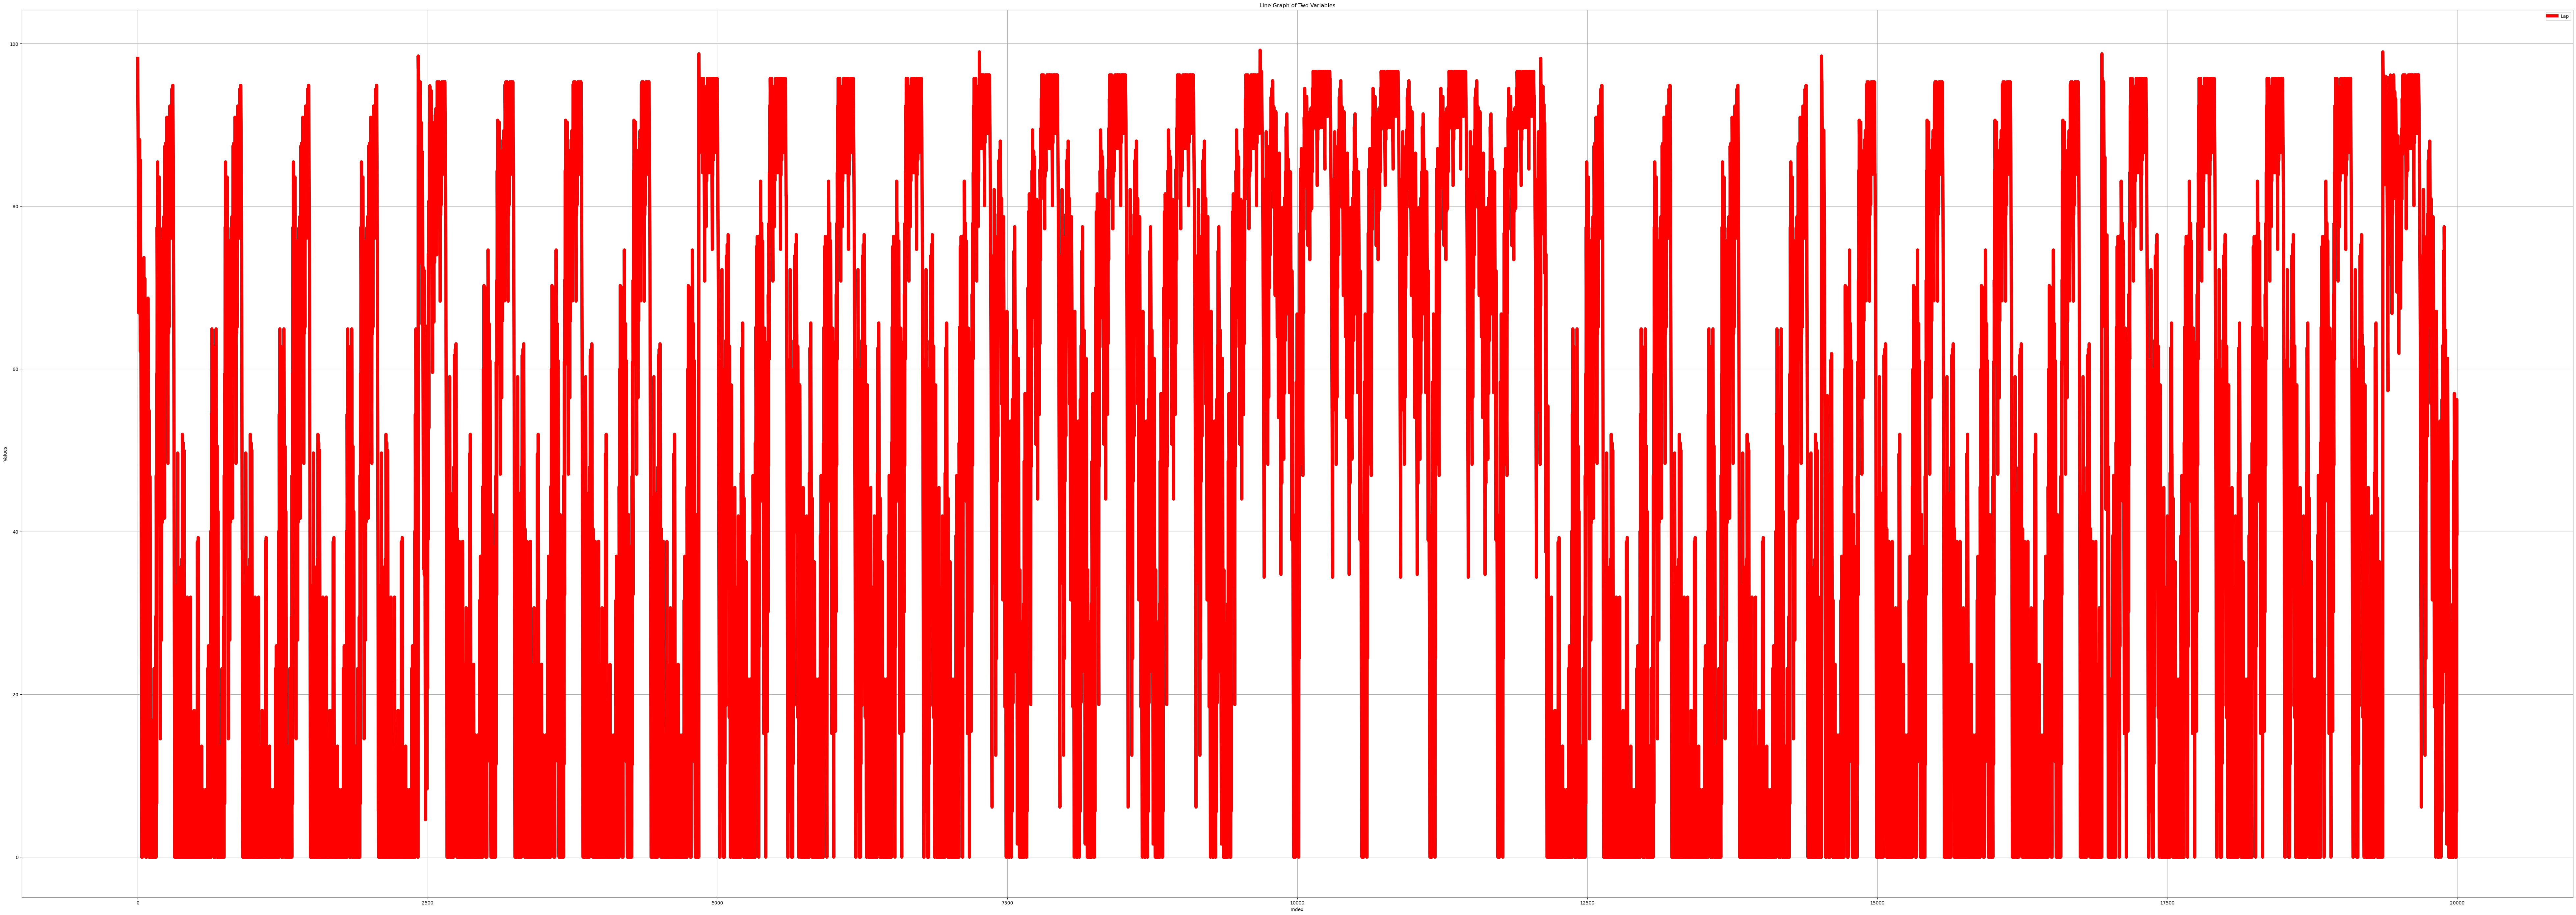

In [19]:
# Plotting the line graph
plt.figure(figsize=(100, 35))  # Optional: Specify the figure size
#plt.plot(df_subset.index, df_subset['Brake'], label='Brake', color='red', linestyle='-', linewidth=7)
#plt.plot(df_subset.index, df_subset['Throttle'], label='Throttle', color='orange', linestyle='-', linewidth=7)
#plt.plot(df_subset.index, df_subset['Speed'], label='Speed', color='blue', linestyle='-', linewidth=7)
plt.plot(df_subset.index, df_subset['Tire_degradation'], label='Lap', color='red', linestyle='-', linewidth=7)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Graph of Two Variables')
plt.legend()  # Show legend
plt.grid()  # Optional: Add a grid for better readability

# Show the plot
plt.show()

In [20]:
print(simulated_dataset.dtypes)


entry log                    float64
Lap                            int64
Motorsport_Type               object
Team                          object
Driver                        object
Track                         object
lap_time                     float64
Throttle                     float64
Brake                        float64
Steering_Position            float64
Speed                        float64
Surface_Roughness            float64
Ambient_Temperature          float64
Humidity                     float64
Wind_Speed                   float64
Lateral_G_Force              float64
Longitudinal_G_Force         float64
Tire_Compound                 object
Tire_Friction_Coefficient    float64
Tire_Tread_Depth             float64
Tire_wear                    float64
cumilative_Tire_Wear         float64
Driving_Style                 object
force_on_tire                float64
Event                         object
front_surface_temp           float64
rear_surface_temp            float64
f